# 11.2 Project Milestone 5
Sadie Harper

11/20/2021

DSC550-T302 Data Mining (2221-1)

<a class="anchor" id="Return-To-Top"></a>

## Table of Contents:
1. [Load Data](#Load-Data)
2. [Handle Missing Data](#Handle-Missing-Data)
3. [Build New Features](#Build-New-Features)
4. [Remove Any Other Features](#Remove-Any-Other-Features)
5. [Build Linear Regression](#Build-Linear-Regression)
6. [Build Decision Tree & Random Forest](#Build-Decision-Tree-&-Random-Forest)
7. [Evaluate All Models](#Evaluate-All-Models)
8. [Conclusion](#Conclusion)

<a class="anchor" id="Load-Data"></a>

## Load Data

In [1]:
# Import librares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

In [2]:
# Read in data
coffee = pd.read_csv('arabica_data_cleaned.csv')
coffee.head()

,Species,Owner,Country_of_Origin,Farm_Name,Lot_Number,Mill,ICO_Number,Company,Region,Producer,...,Quakers,Color,Category_Two_Defects,Expiration,Certification_Body,Certification_Address,Certification_Contact,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,edwin agasso,"Tanzania, United Republic Of",burka coffee estate,NaN,rafiki (coffee) limited,033/DE/006/007,tcb,arusha,BURKA COFFEE ESTATE,...,0.0,Green,5,"April 19th, 2014",Tanzanian Coffee Board,047484d5700c44f033915e632e0c6013d985cd79,127e651fc8b7c35802268599656f2c76bf041b15,1400.00,1400.00,1400.00
1,Arabica,nucoffee,Brazil,caxambu,NaN,NaN,002/1251/0183,nucoffee,NaN,Carmem Lucia Chaves de Brito,...,0.0,Green,1,"January 22nd, 2013",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,925.00,938.00,930.00
2,Arabica,nucoffee,Brazil,santa mariana,NaN,NaN,002/1251/185,nucoffee,south of minas,Glycia Maria,...,0.0,Blue-Green,2,"January 22nd, 2013",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,950.00,950.00,950.00
3,Arabica,exportadora de cafe condor s.a,Colombia,NaN,NaN,trilladora boananza,NaN,exportadora de cafe condor s.a,NaN,Exportadora Condor,...,0.0,NaN,4,"May 22nd, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,1515.00,1655.00,1585.00
4,Arabica,kona pacific farmers cooperative,United States (Hawaii),NaN,NaN,NaN,2131202,kona pacific farmers cooperative,kona,NaN,...,0.0,Bluish-Green,6,"December 20th, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,518.16,518.16,518.16


<a class="anchor" id="Handle-Missing-Data"></a>

## Handle Missing Data

In [3]:
# Number of null values in each column
print('Size of coffee data:', coffee.shape)
coffee.isna().sum().sort_values(ascending=False)

Size of coffee data: (1309, 41)


Lot_Number               1040
Farm_Name                 355
Mill                      309
Producer                  229
Color                     215
Company                   208
Variety                   199
Processing_Method         150
ICO_Number                146
Region                     56
Owner                       7
Owner_1                     7
Quakers                     1
Category_Two_Defects        0
Moisture                    0
Category_One_Defects        0
Total_Cup_Points            0
Species                     0
Certification_Body          0
Expiration                  0
Sweetness                   0
Certification_Address       0
Certification_Contact       0
altitude_low_meters         0
altitude_high_meters        0
Cupper_Points               0
Aftertaste                  0
Clean_Cup                   0
Uniformity                  0
Balance                     0
Body                        0
Acidity                     0
Flavor                      0
Aroma     

Majority of the features don't have any missing data which is good. For the features that do have some null values, most of them are descriptive features versus numeric metrics. I am going to drop the four features with the most missing data because they won't contribute much to predicting total quality and it wouldn't be worth trying to predict what the null values are with so many missing. Lot Number, Farm Name, Mill, and Producer will be removed for the previous reasons.


The Company, ICO Number, and Region columns I will drop altogether. They each have enough missing values that I don't want to drop those rows. I also did some research and the ICO (International Coffee Organization) number is a code based of the country and owner of the coffee, I already have each of these variables so no need to try and predict these unique codes. Company can be dropped for the same reason, I have an owner feature already with far less nulls and filling Company with the most common record could be misleading. Region is a similar descriptor to Country and after looking through the values in that column, they are not consistent and there appear to be a lot of errors so it would be difficult to understand each value.

In [4]:
# Drop columns
coffee = coffee.drop(['Lot_Number', 'Farm_Name', 'Mill', 'Producer', 'Company', 'ICO_Number', 'Region'], axis=1)
print('Coffee dataframe new size:', coffee.shape)

Coffee dataframe new size: (1309, 34)


In [5]:
# Check which rows have the 7 missing Owner & Owner_1 values
pd.set_option('display.max_columns', None)
coffee[coffee['Owner'].isna()]

,Species,Owner,Country_of_Origin,Number_of_Bags,Bag_Weight_kg,In_Country_Partner,Harvest_Year,Grading_Date,Owner_1,Variety,Processing_Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category_One_Defects,Quakers,Color,Category_Two_Defects,Expiration,Certification_Body,Certification_Address,Certification_Contact,altitude_low_meters,altitude_high_meters,altitude_mean_meters
295,Arabica,NaN,Honduras,275,1.0,Instituto Hondureño del Café,2015,"March 11th, 2015",NaN,Catuai,Natural / Dry,7.42,7.33,7.00,7.42,7.33,7.33,10.0,10.0,10.0,7.33,81.17,0.13,0,0.0,Green,1,"March 10th, 2016",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,1450.0,1450.0,1450.0
296,Arabica,NaN,Honduras,275,1.0,Instituto Hondureño del Café,2015,"March 11th, 2015",NaN,Catuai,Natural / Dry,7.25,7.33,7.08,7.50,7.25,7.33,10.0,10.0,10.0,7.00,80.75,0.13,0,0.0,Green,1,"March 10th, 2016",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,1450.0,1450.0,1450.0
380,Arabica,NaN,Honduras,275,1.0,Instituto Hondureño del Café,2014,"May 16th, 2014",NaN,Caturra,Natural / Dry,7.50,7.33,7.50,7.50,7.17,7.17,10.0,10.0,10.0,7.50,81.67,0.10,0,0.0,Green,5,"May 16th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,1400.0,1400.0,1400.0
381,Arabica,NaN,Honduras,275,1.0,Instituto Hondureño del Café,2014,"May 16th, 2014",NaN,Caturra,Natural / Dry,7.50,7.50,7.33,7.33,7.33,7.33,10.0,10.0,10.0,7.50,81.83,0.10,0,0.0,Green,4,"May 16th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,1350.0,1350.0,1350.0
402,Arabica,NaN,Honduras,275,1.0,Instituto Hondureño del Café,2015,"April 8th, 2014",NaN,Caturra,Natural / Dry,7.67,7.50,7.67,7.50,7.67,7.67,10.0,10.0,10.0,7.83,83.50,0.10,0,0.0,Green,3,"April 8th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,1350.0,1350.0,1350.0
403,Arabica,NaN,Honduras,275,1.0,Instituto Hondureño del Café,2015,"April 8th, 2014",NaN,Caturra,Natural / Dry,7.67,7.67,7.50,7.67,7.50,7.67,10.0,10.0,10.0,7.50,83.17,0.11,0,0.0,Green,3,"April 8th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,1350.0,1350.0,1350.0
443,Arabica,NaN,Colombia,250,70.0,Almacafé,2012,"April 11th, 2012",NaN,Caturra,Washed / Wet,7.50,7.58,7.42,7.67,7.50,7.58,10.0,10.0,10.0,7.50,82.75,0.00,0,0.0,Blue-Green,0,"April 11th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,1400.0,1850.0,1625.0


Both Owner and Owner_1 are null for the same seven observations. I will drop these seven rows and also drop the Owner_1 column, no need to have two Owner features.

In [6]:
# Drop Owner_1 column and null Owner rows
coffee = coffee.drop(['Owner_1'], axis=1)
coffee = coffee.dropna(subset=['Owner'])
print('Coffee dataframe new size:', coffee.shape)

Coffee dataframe new size: (1302, 33)


Color, Variety, and Processing Method I will fill with the most represented value in each column. Before I do that, I am going to drop any rows that are missing all three of these columns.

In [7]:
# Drop rows with missing data in 3 columns
coffee = coffee.dropna(subset=['Color', 'Variety', 'Processing_Method'], how='all')
print('Coffee dataframe new size:', coffee.shape)

Coffee dataframe new size: (1202, 33)


In [8]:
# Check top value
print(coffee['Color'].describe())

count      1087
unique        4
top       Green
freq        843
Name: Color, dtype: object


In [9]:
# Fill nulls with most represented value
coffee['Color'] = coffee['Color'].fillna('Green')
coffee.Color.isna().sum()

0

In [10]:
# Check top value
print(coffee['Variety'].describe())

count        1103
unique         29
top       Caturra
freq          250
Name: Variety, dtype: object


In [11]:
# Fill nulls with most represented value
coffee['Variety'] = coffee['Variety'].fillna('Caturra')
coffee.Color.isna().sum()

0

In [12]:
# Check top value
print(coffee['Processing_Method'].describe())

count             1152
unique               5
top       Washed / Wet
freq               811
Name: Processing_Method, dtype: object


In [13]:
# Fill nulls with most represented value
coffee['Processing_Method'] = coffee['Processing_Method'].fillna('Washed / Wet')
coffee.Color.isna().sum()

0

Quakers is the last column with a null value so I will fill that final null with the average value for Quakers.

In [14]:
# Check mean value for Quakers
print(coffee['Quakers'].describe())

count    1201.000000
mean        0.188177
std         0.870571
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.000000
Name: Quakers, dtype: float64


In [15]:
# Check if values are actually floats or integers
coffee['Quakers'].unique()

array([ 0.,  6.,  2.,  8.,  1.,  3.,  7.,  5.,  4., nan, 11.,  9.])

In [16]:
# Fill nulls with 0
coffee['Quakers'] = coffee['Quakers'].fillna(0.0)
coffee.Quakers.isna().sum()

0

<a class="anchor" id="Build-New-Features"></a>

## Build New Features

I have some categorical variables in the coffee data that don't have too many values and so they would be good to recode as dummy variables. I will do this with Color and Processing Method.

In [17]:
# Convert categorical data to numbers
cat_features = ['Color', 'Processing_Method']
coffee_cat = coffee[cat_features]
# One Hot Encoding 
coffee_cat_dummies = pd.get_dummies(coffee_cat)
# Check the data
print(coffee_cat_dummies.head(8))

   Color_Blue-Green  Color_Bluish-Green  Color_Green  Color_None  \
0                 0                   0            1           0   
1                 0                   0            1           0   
2                 1                   0            0           0   
3                 0                   0            1           0   
4                 0                   1            0           0   
5                 0                   0            1           0   
6                 0                   1            0           0   
7                 0                   0            1           0   

   Processing_Method_Natural / Dry  Processing_Method_Other  \
0                                0                        0   
1                                1                        0   
2                                1                        0   
3                                1                        0   
4                                1                        0   
5        

In [18]:
# Merge on new varaibles and drop old categorical variables
coffee = coffee.join(coffee_cat_dummies)
coffee = coffee.drop(['Color', 'Processing_Method'], axis=1)
coffee.head()

,Species,Owner,Country_of_Origin,Number_of_Bags,Bag_Weight_kg,In_Country_Partner,Harvest_Year,Grading_Date,Variety,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category_One_Defects,Quakers,Category_Two_Defects,Expiration,Certification_Body,Certification_Address,Certification_Contact,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Color_Blue-Green,Color_Bluish-Green,Color_Green,Color_None,Processing_Method_Natural / Dry,Processing_Method_Other,Processing_Method_Pulped natural / honey,Processing_Method_Semi-washed / Semi-pulped,Processing_Method_Washed / Wet
0,Arabica,edwin agasso,"Tanzania, United Republic Of",300,2.0,Tanzanian Coffee Board,2012,"April 19th, 2013",Arusha,7.67,7.50,7.33,7.25,7.58,7.75,10.0,10.0,10.0,7.75,82.83,0.11,0,0.0,5,"April 19th, 2014",Tanzanian Coffee Board,047484d5700c44f033915e632e0c6013d985cd79,127e651fc8b7c35802268599656f2c76bf041b15,1400.00,1400.00,1400.00,0,0,1,0,0,0,0,0,1
1,Arabica,nucoffee,Brazil,84,60.0,NUCOFFEE,2012,"January 23rd, 2012",Arusha,7.67,7.58,7.42,7.00,7.50,7.58,10.0,10.0,10.0,7.50,82.25,0.12,0,0.0,1,"January 22nd, 2013",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,925.00,938.00,930.00,0,0,1,0,1,0,0,0,0
2,Arabica,nucoffee,Brazil,51,60.0,NUCOFFEE,2012,"January 23rd, 2012",Arusha,7.75,7.50,7.42,7.42,7.50,7.42,10.0,10.0,10.0,7.42,82.42,0.11,0,0.0,2,"January 22nd, 2013",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,950.00,950.00,950.00,1,0,0,0,1,0,0,0,0
3,Arabica,exportadora de cafe condor s.a,Colombia,250,70.0,Almacafé,2012,"May 22nd, 2012",Arusha,7.67,7.58,7.50,7.50,7.75,7.50,10.0,10.0,10.0,7.50,83.00,0.00,1,0.0,4,"May 22nd, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,1515.00,1655.00,1585.00,0,0,1,0,1,0,0,0,0
4,Arabica,kona pacific farmers cooperative,United States (Hawaii),3,1.0,Specialty Coffee Association,2011,"December 21st, 2011",Arusha,7.08,7.33,7.17,7.25,7.33,7.67,10.0,10.0,10.0,6.92,80.75,0.13,0,0.0,6,"December 20th, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,518.16,518.16,518.16,0,1,0,0,1,0,0,0,0


<a class="anchor" id="Remove-Any-Other-Features"></a>

## Remove Any Other Features

In [19]:
coffee.head()

,Species,Owner,Country_of_Origin,Number_of_Bags,Bag_Weight_kg,In_Country_Partner,Harvest_Year,Grading_Date,Variety,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category_One_Defects,Quakers,Category_Two_Defects,Expiration,Certification_Body,Certification_Address,Certification_Contact,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Color_Blue-Green,Color_Bluish-Green,Color_Green,Color_None,Processing_Method_Natural / Dry,Processing_Method_Other,Processing_Method_Pulped natural / honey,Processing_Method_Semi-washed / Semi-pulped,Processing_Method_Washed / Wet
0,Arabica,edwin agasso,"Tanzania, United Republic Of",300,2.0,Tanzanian Coffee Board,2012,"April 19th, 2013",Arusha,7.67,7.50,7.33,7.25,7.58,7.75,10.0,10.0,10.0,7.75,82.83,0.11,0,0.0,5,"April 19th, 2014",Tanzanian Coffee Board,047484d5700c44f033915e632e0c6013d985cd79,127e651fc8b7c35802268599656f2c76bf041b15,1400.00,1400.00,1400.00,0,0,1,0,0,0,0,0,1
1,Arabica,nucoffee,Brazil,84,60.0,NUCOFFEE,2012,"January 23rd, 2012",Arusha,7.67,7.58,7.42,7.00,7.50,7.58,10.0,10.0,10.0,7.50,82.25,0.12,0,0.0,1,"January 22nd, 2013",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,925.00,938.00,930.00,0,0,1,0,1,0,0,0,0
2,Arabica,nucoffee,Brazil,51,60.0,NUCOFFEE,2012,"January 23rd, 2012",Arusha,7.75,7.50,7.42,7.42,7.50,7.42,10.0,10.0,10.0,7.42,82.42,0.11,0,0.0,2,"January 22nd, 2013",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,950.00,950.00,950.00,1,0,0,0,1,0,0,0,0
3,Arabica,exportadora de cafe condor s.a,Colombia,250,70.0,Almacafé,2012,"May 22nd, 2012",Arusha,7.67,7.58,7.50,7.50,7.75,7.50,10.0,10.0,10.0,7.50,83.00,0.00,1,0.0,4,"May 22nd, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,1515.00,1655.00,1585.00,0,0,1,0,1,0,0,0,0
4,Arabica,kona pacific farmers cooperative,United States (Hawaii),3,1.0,Specialty Coffee Association,2011,"December 21st, 2011",Arusha,7.08,7.33,7.17,7.25,7.33,7.67,10.0,10.0,10.0,6.92,80.75,0.13,0,0.0,6,"December 20th, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,518.16,518.16,518.16,0,1,0,0,1,0,0,0,0


In [20]:
round(coffee.describe(include='all'))

,Species,Owner,Country_of_Origin,Number_of_Bags,Bag_Weight_kg,In_Country_Partner,Harvest_Year,Grading_Date,Variety,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category_One_Defects,Quakers,Category_Two_Defects,Expiration,Certification_Body,Certification_Address,Certification_Contact,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Color_Blue-Green,Color_Bluish-Green,Color_Green,Color_None,Processing_Method_Natural / Dry,Processing_Method_Other,Processing_Method_Pulped natural / honey,Processing_Method_Semi-washed / Semi-pulped,Processing_Method_Washed / Wet
count,1202,1202,1202,1202.0,1202.0,1202,1202.0,1202,1202,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202,1202,1202,1202,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0
unique,1,297,36,NaN,NaN,27,NaN,510,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,509,26,30,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Arabica,juan luis alvarado romero,Mexico,NaN,NaN,Specialty Coffee Association,NaN,"July 11th, 2012",Caturra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"December 26th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1202,155,235,NaN,NaN,247,NaN,25,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,247,245,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,153.0,195.0,NaN,2014.0,NaN,NaN,8.0,8.0,7.0,8.0,8.0,8.0,10.0,10.0,10.0,7.0,82.0,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1265.0,1305.0,1285.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
std,NaN,NaN,NaN,130.0,1607.0,NaN,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0,5.0,NaN,NaN,NaN,NaN,473.0,506.0,482.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,NaN,NaN,NaN,1.0,0.0,NaN,2009.0,NaN,NaN,5.0,6.0,6.0,5.0,6.0,6.0,6.0,0.0,1.0,5.0,60.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,NaN,NaN,NaN,15.0,1.0,NaN,2012.0,NaN,NaN,7.0,7.0,7.0,7.0,7.0,7.0,10.0,10.0,10.0,7.0,81.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1026.0,1072.0,1050.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,NaN,NaN,NaN,155.0,45.0,NaN,2014.0,NaN,NaN,8.0,8.0,7.0,8.0,8.0,8.0,10.0,10.0,10.0,8.0,82.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,1300.0,1311.0,1300.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,NaN,NaN,NaN,275.0,69.0,NaN,2015.0,NaN,NaN,8.0,8.0,8.0,8.0,8.0,8.0,10.0,10.0,10.0,8.0,84.0,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,1550.0,1600.0,1585.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Looking at my cleaned up coffee dataset I have some more columns that appear redundant. I have three columns that describe the altitude at which the coffee was grown. There is no need to have a low, high, and mean so I will drop the low and high and keep the mean.

I will drop the Species column because all the coffee is Arabica. 

I am going to go ahead and drop Owner because with 297 unique values, that is far too many to one-hot encode and I do not see how the owner can heavily contribute to how quality the coffee is.

Expiration will be dropped because this is just descriptive of when the coffee expires and it doesn't contribute to the quality.

Certification Body, Certification Address, and Certification Contact each have a lot of unique values for a categorical variable. The Address and Contact specifically are not interpretable to me or someone not familiar with the details of certifying coffee so for those reasons I will also remove these three columns.

In [21]:
# Drop columns
coffee = coffee.drop(['Species', 'altitude_low_meters', 'altitude_high_meters', 'Owner', 'Expiration', 'Certification_Body',
                     'Certification_Address', 'Certification_Contact'], axis=1)
print('Coffee dataframe new size:', coffee.shape)

Coffee dataframe new size: (1202, 32)


I have a lot of numerical metrics that contribute to the total quality score so I want to make sure I remove any highly correlated features.

In [22]:
# Create correlation matrix
corr_matrix = coffee.corr().abs()
corr_matrix

,Number_of_Bags,Bag_Weight_kg,Harvest_Year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category_One_Defects,Quakers,Category_Two_Defects,altitude_mean_meters,Color_Blue-Green,Color_Bluish-Green,Color_Green,Color_None,Processing_Method_Natural / Dry,Processing_Method_Other,Processing_Method_Pulped natural / honey,Processing_Method_Semi-washed / Semi-pulped,Processing_Method_Washed / Wet
Number_of_Bags,1.000000,0.083759,0.241510,0.002209,0.002045,0.005511,0.039526,0.041944,0.037640,0.029204,0.033232,0.024379,0.000555,0.031871,0.101033,0.067274,0.141665,0.003174,0.112421,0.068558,0.058132,0.155993,0.142186,0.010076,0.027984,0.011877,0.099139,0.043550
Bag_Weight_kg,0.083759,1.000000,0.101863,0.032945,0.038885,0.053534,0.028015,0.022390,0.023924,0.033890,0.023834,0.019433,0.037816,0.046201,0.012318,0.023791,0.055628,0.029878,0.018161,0.025676,0.051812,0.033636,0.024338,0.024754,0.014886,0.009887,0.022985,0.004218
Harvest_Year,0.241510,0.101863,1.000000,0.006104,0.072587,0.060283,0.018788,0.055593,0.040060,0.046267,0.076740,0.044367,0.107224,0.084884,0.109079,0.086014,0.298243,0.134262,0.008927,0.029446,0.006001,0.053419,0.151876,0.088104,0.077693,0.130204,0.102937,0.086669
Aroma,0.002209,0.032945,0.006104,1.000000,0.739377,0.693085,0.610604,0.573475,0.617991,0.145156,0.175739,0.070050,0.592895,0.687784,0.109050,0.096343,0.012248,0.177273,0.150807,0.063619,0.074373,0.033543,0.119443,0.052218,0.046990,0.010914,0.029801,0.042835
Flavor,0.002045,0.038885,0.072587,0.739377,1.000000,0.859249,0.742577,0.677069,0.729482,0.226444,0.268298,0.143246,0.729809,0.826317,0.122964,0.067173,0.011112,0.223757,0.139618,0.053536,0.067850,0.029057,0.106448,0.119346,0.028479,0.000506,0.050696,0.121284
Aftertaste,0.005511,0.053534,0.060283,0.693085,0.859249,1.000000,0.703355,0.683609,0.770947,0.227405,0.269663,0.131324,0.723148,0.820194,0.164928,0.093233,0.006770,0.247528,0.109810,0.054333,0.112528,0.043978,0.142094,0.111910,0.022966,0.041456,0.045118,0.123556
Acidity,0.039526,0.028015,0.018788,0.610604,0.742577,0.703355,1.000000,0.620636,0.653083,0.168489,0.141426,0.090228,0.601068,0.698552,0.108409,0.075414,0.017112,0.167013,0.178135,0.050488,0.066297,0.012374,0.133707,0.037050,0.059075,0.003013,0.009649,0.019274
Body,0.041944,0.022390,0.055593,0.573475,0.677069,0.683609,0.620636,1.000000,0.696736,0.096545,0.114004,0.061398,0.568234,0.653516,0.198456,0.023755,0.000287,0.117336,0.102234,0.009581,0.099963,0.014280,0.103747,0.156701,0.051835,0.045050,0.026856,0.146584
Balance,0.037640,0.023924,0.040060,0.617991,0.729482,0.770947,0.653083,0.696736,1.000000,0.235805,0.242087,0.119462,0.657174,0.772347,0.211255,0.074457,0.011888,0.201613,0.098128,0.030882,0.106706,0.036923,0.118612,0.130703,0.023154,0.004297,0.045570,0.131657
Uniformity,0.029204,0.033890,0.046267,0.145156,0.226444,0.227405,0.168489,0.096545,0.235805,1.000000,0.436483,0.382096,0.207685,0.537764,0.011371,0.130921,0.027763,0.173770,0.097121,0.036720,0.016760,0.000082,0.021337,0.059950,0.021433,0.034535,0.012204,0.046565


In [23]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print('Features to drop:', to_drop)

# Drop features 
coffee.drop(to_drop, axis=1, inplace=True)
print('Coffee dataset new size:', coffee.shape)

Features to drop: []
Coffee dataset new size: (1202, 32)


C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


There were no highly correlated features. Now I want to only keep the numerical features that are highly related to the total cup points.

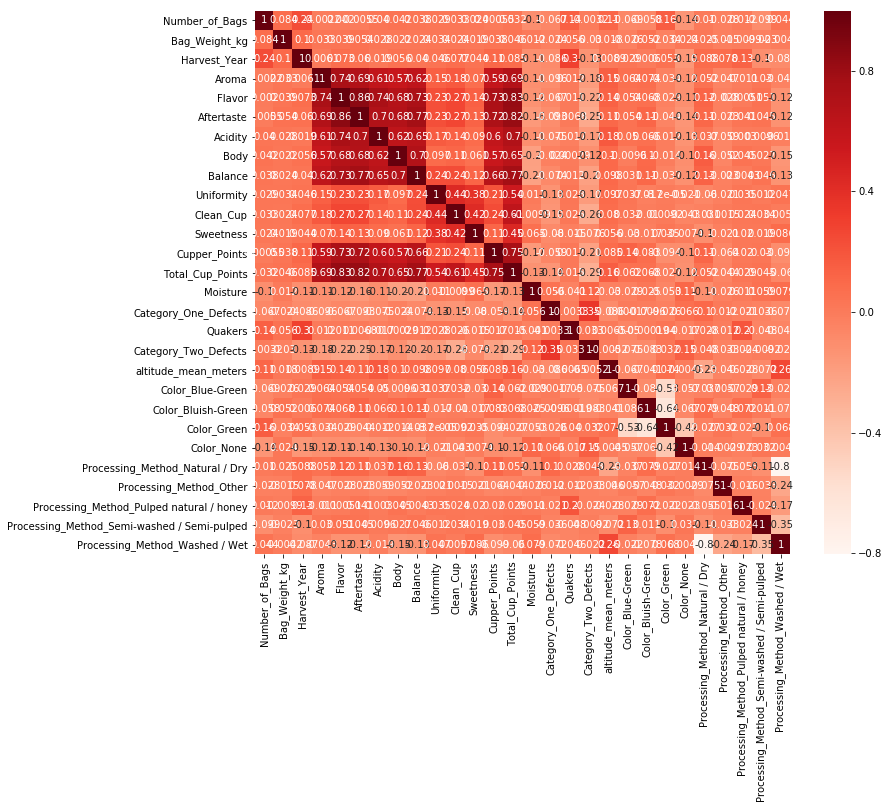

In [24]:
# Using Pearson Correlation and creating an easier to interpret correlation matrix
plt.figure(figsize=(12,10))
cor = coffee.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [25]:
# Correlation with output variable
cor_target = abs(cor["Total_Cup_Points"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Aroma               0.687784
Flavor              0.826317
Aftertaste          0.820194
Acidity             0.698552
Body                0.653516
Balance             0.772347
Uniformity          0.537764
Clean_Cup           0.613649
Cupper_Points       0.747176
Total_Cup_Points    1.000000
Name: Total_Cup_Points, dtype: float64

In [26]:
# Selecting non highly correlated features
irrelevant_features = cor_target[cor_target<0.5]
irrelevant_features

Number_of_Bags                                 0.031871
Bag_Weight_kg                                  0.046201
Harvest_Year                                   0.084884
Sweetness                                      0.452911
Moisture                                       0.125491
Category_One_Defects                           0.142800
Quakers                                        0.015364
Category_Two_Defects                           0.288869
altitude_mean_meters                           0.155985
Color_Blue-Green                               0.062007
Color_Bluish-Green                             0.067575
Color_Green                                    0.027129
Color_None                                     0.120434
Processing_Method_Natural / Dry                0.052327
Processing_Method_Other                        0.044318
Processing_Method_Pulped natural / honey       0.029135
Processing_Method_Semi-washed / Semi-pulped    0.045058
Processing_Method_Washed / Wet                 0

In [27]:
# Drop non highly correlated features (except the dummy variables)
coffee = coffee.drop(['Number_of_Bags', 'Bag_Weight_kg', 'Harvest_Year', 'Sweetness', 'Moisture', 'Category_One_Defects', 
                      'Quakers', 'Category_Two_Defects', 'altitude_mean_meters'], axis=1)
print('Coffee dataset new size:', coffee.shape)

Coffee dataset new size: (1202, 23)


In [28]:
coffee.head()

,Country_of_Origin,In_Country_Partner,Grading_Date,Variety,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Cupper_Points,Total_Cup_Points,Color_Blue-Green,Color_Bluish-Green,Color_Green,Color_None,Processing_Method_Natural / Dry,Processing_Method_Other,Processing_Method_Pulped natural / honey,Processing_Method_Semi-washed / Semi-pulped,Processing_Method_Washed / Wet
0,"Tanzania, United Republic Of",Tanzanian Coffee Board,"April 19th, 2013",Arusha,7.67,7.50,7.33,7.25,7.58,7.75,10.0,10.0,7.75,82.83,0,0,1,0,0,0,0,0,1
1,Brazil,NUCOFFEE,"January 23rd, 2012",Arusha,7.67,7.58,7.42,7.00,7.50,7.58,10.0,10.0,7.50,82.25,0,0,1,0,1,0,0,0,0
2,Brazil,NUCOFFEE,"January 23rd, 2012",Arusha,7.75,7.50,7.42,7.42,7.50,7.42,10.0,10.0,7.42,82.42,1,0,0,0,1,0,0,0,0
3,Colombia,Almacafé,"May 22nd, 2012",Arusha,7.67,7.58,7.50,7.50,7.75,7.50,10.0,10.0,7.50,83.00,0,0,1,0,1,0,0,0,0
4,United States (Hawaii),Specialty Coffee Association,"December 21st, 2011",Arusha,7.08,7.33,7.17,7.25,7.33,7.67,10.0,10.0,6.92,80.75,0,1,0,0,1,0,0,0,0


<a class="anchor" id="Build-Linear-Regression"></a>

## Build Linear Regression

I am starting with a linear regression model because I am looking to predict a numerical value. A linear regression is a quick and easy model to implement and it fits with the coffee data. As shown below, the target variable has a linear relationship with the other numerical features in the data. I will also make sure everything contains a normal distribution to meet the assumptions of a linear model.

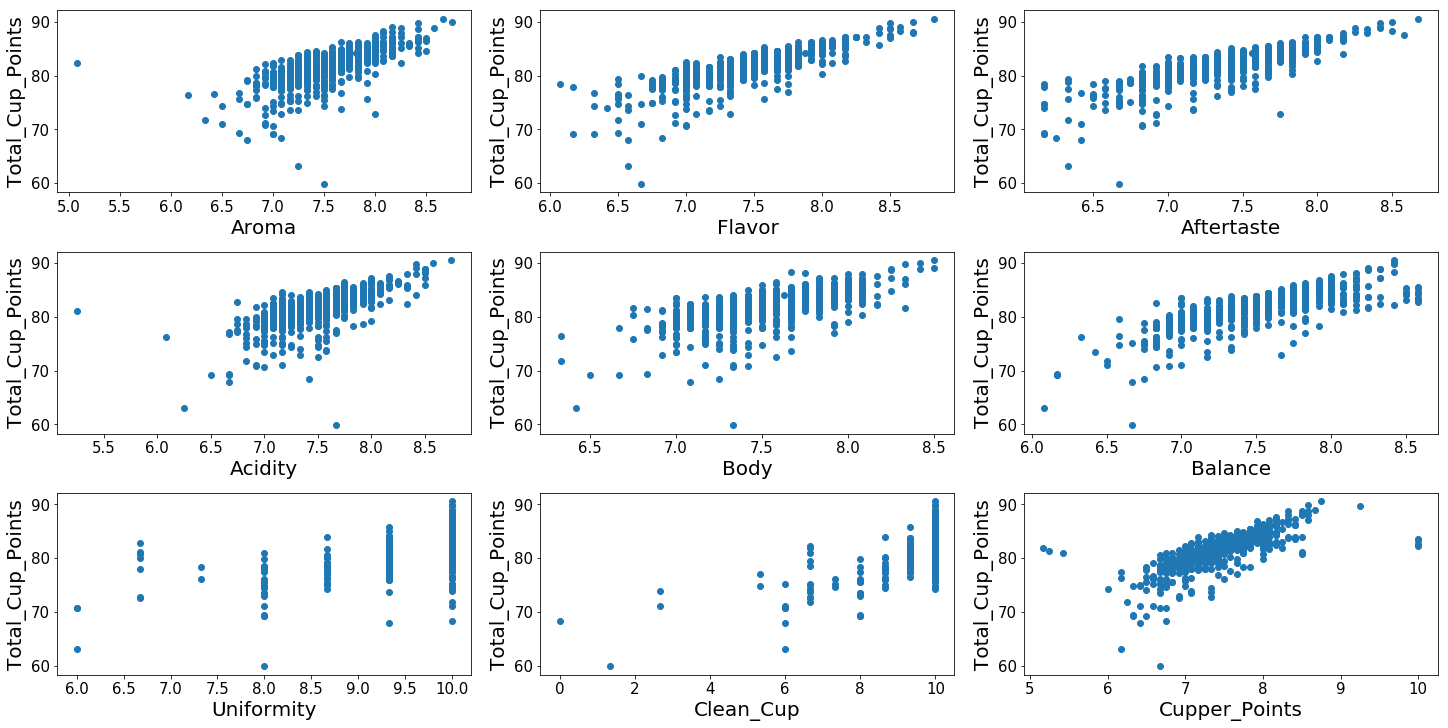

In [29]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3, constrained_layout=True)

# Specify the features of interest
num_features = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 'Cupper_Points']
yaxes = num_features
xaxes = ['Total_Cup_Points', 'Total_Cup_Points', 'Total_Cup_Points', 'Total_Cup_Points','Total_Cup_Points', 'Total_Cup_Points', 'Total_Cup_Points', 'Total_Cup_Points', 'Total_Cup_Points']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.scatter(coffee[num_features[idx]],coffee['Total_Cup_Points'])
    ax.set_xlabel(yaxes[idx], fontsize=20)
    ax.set_ylabel(xaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

plt.show()

Skewness: -1.9050886582013093


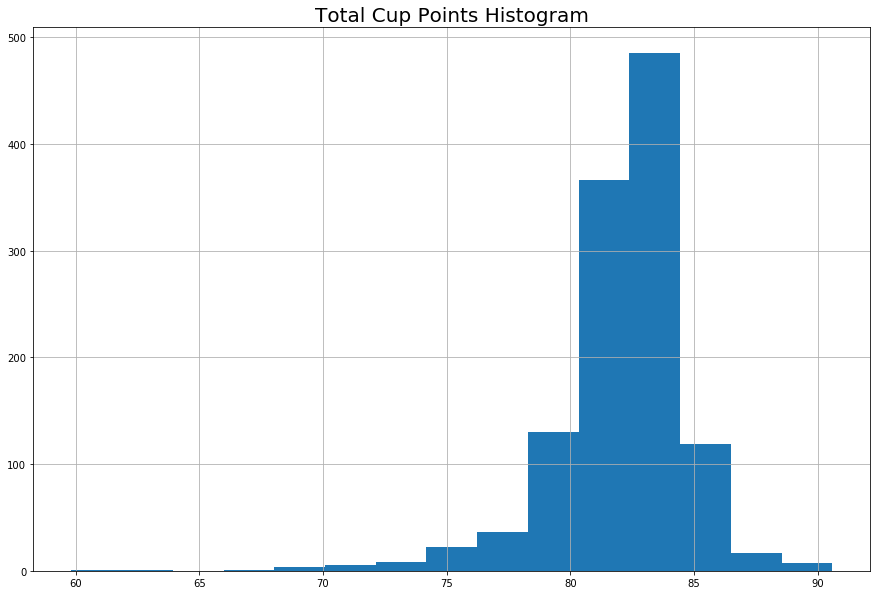

In [30]:
# Check distribution of target variable
plt.rcParams['figure.figsize'] = (15, 10)
print('Skewness:', coffee['Total_Cup_Points'].skew())
coffee['Total_Cup_Points'].hist(bins=15)
plt.title('Total Cup Points Histogram', fontsize=20)
plt.show()

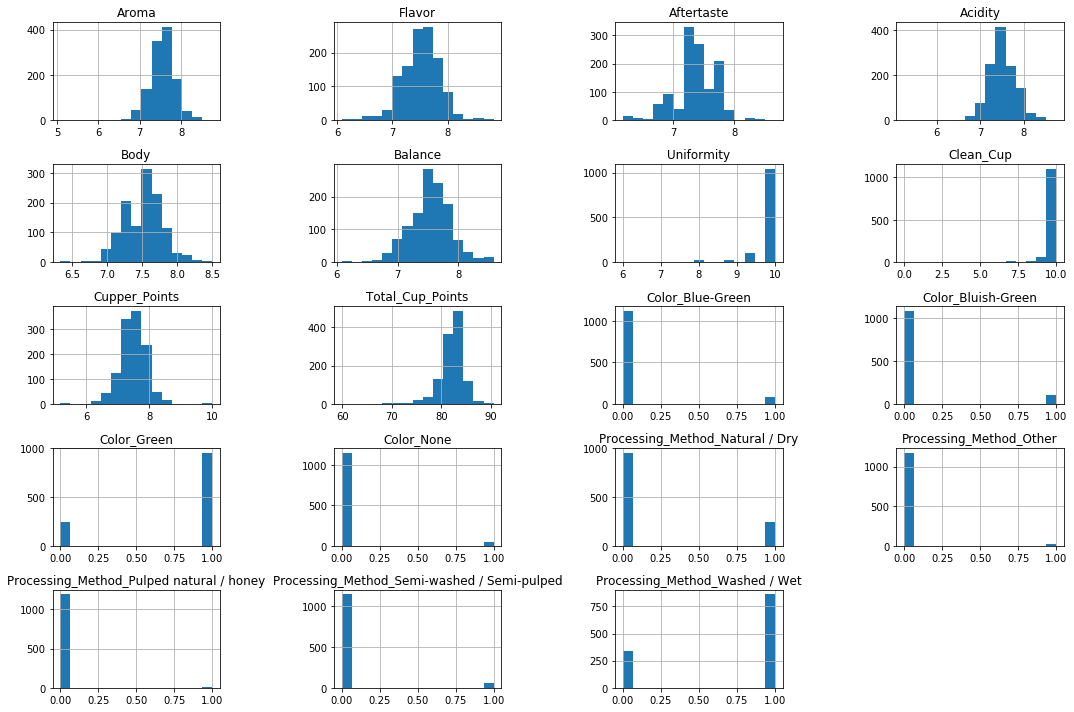

In [31]:
# Check other distributions
coffee.hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()

The Clean Cup and Uniformity are the two features with the worst distributions. They do not have much variation in their values. I think it would be better off to exclude them from the model than to try and transform them. I don't see how they could provide much insight.

In [32]:
# Split off target variable
x = coffee.drop(['Total_Cup_Points', 'Country_of_Origin', 'In_Country_Partner', 'Variety', 'Grading_Date', 'Uniformity', 'Clean_Cup'], axis=1)
y = coffee["Total_Cup_Points"]

In [33]:
# Split train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
print("No. of samples in training set: ", x_train.shape[0])
print("No. of samples in validation set:", x_test.shape[0])

No. of samples in training set:  961
No. of samples in validation set: 241


In [34]:
# Initialize scaler
scaler = StandardScaler()

In [35]:
# Fit scaler to training/test set
train_scaled = scaler.fit_transform(x_train)
test_scaled = scaler.transform(x_test)

In [36]:
# Initialize model
model_lr = LinearRegression()

space = dict()
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

randomizedsearch = RandomizedSearchCV(model_lr, space, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [37]:
# Search for best model
best_model = randomizedsearch.fit(train_scaled, y_train)

C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


<a class="anchor" id="Build-Decision-Tree-&-Random-Forest"></a>

## Build Decision Tree & Random Forest

For additional models I am building a decision tree and random forest. These are both popular options and are known to perform well. I like the decison tree becuase they are easier to interpret once built. The random forest can be good if the data works well with multiple weak learners. In general, both models are good for regression problems so I think it's worth trying both on this dataset.

In [38]:
# Initialize models
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

In [39]:
# Set up for randomized search
space_tree = dict()
space_tree['max_features'] = ['auto', 'sqrt', 'log2', None]
space_tree['min_samples_split'] = [2, 3, 4]

space_rf = dict()
space_rf['bootstrap'] = [True, False]
space_rf['max_features'] = ['auto', 'sqrt', 'log2']

In [40]:
# Set up search
randomizedsearch_tree = RandomizedSearchCV(tree_model, space_tree)
randomizedsearch_rf = RandomizedSearchCV(rf_model, space_rf, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [41]:
best_model_tree = randomizedsearch_tree.fit(train_scaled, y_train)
best_model_rf = randomizedsearch_rf.fit(train_scaled, y_train)

C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [42]:
# Fit models
best_model_tree.fit(train_scaled, y_train)
best_model_rf.fit(train_scaled, y_train)

C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']})

<a class="anchor" id="Evaluate-All-Models"></a>

## Evaluate All Models

In [43]:
# Use MSE and MAE to evaluate train set
mse = mean_squared_error(y_train, best_model.predict(train_scaled))
mae = mean_absolute_error(y_train, best_model.predict(train_scaled))
r2 = r2_score(y_train, best_model.predict(train_scaled))

tree_mse = mean_squared_error(y_train, best_model_tree.predict(train_scaled))
tree_mae = mean_absolute_error(y_train, best_model_tree.predict(train_scaled))
tree_r2 = r2_score(y_train, best_model_tree.predict(train_scaled))

rf_mse = mean_squared_error(y_train, best_model_rf.predict(train_scaled))
rf_mae = mean_absolute_error(y_train, best_model_rf.predict(train_scaled))
rf_r2 = r2_score(y_train, best_model_rf.predict(train_scaled))

print("Linear Regression Training")
print('MSE = ', round(mse,4))
print('MAE = ', round(mae,4))
print('RMSE = ', round(np.sqrt(mse),4))
print('R-Squared = ', round(r2,4))

print('\n')
print("Decision Tree Training")
print("MSE = ", round(tree_mse,4))
print("MAE = ", round(tree_mae,4))
print("RMSE = ", round(np.sqrt(tree_mse),4))
print('R-Squared = ', round(tree_r2,4))

print('\n')
print("Random Forest Training")
print("MSE = ", round(rf_mse,4))
print("MAE = ", round(rf_mae, 4))
print("RMSE = ", round(np.sqrt(rf_mse),4))
print('R-Squared = ', round(rf_r2,4))

Linear Regression Training
MSE =  1.5573
MAE =  0.6445
RMSE =  1.2479
R-Squared =  0.7775


Decision Tree Training
MSE =  0.0406
MAE =  0.0643
RMSE =  0.2016
R-Squared =  0.9942


Random Forest Training
MSE =  0.2051
MAE =  0.2127
RMSE =  0.4529
R-Squared =  0.9707


In [44]:
# Use MSE and MAE evaluate on test set
test_mse = mean_squared_error(y_test, best_model.predict(test_scaled))
test_mae = mean_absolute_error(y_test, best_model.predict(test_scaled))
test_r2 = r2_score(y_test, best_model.predict(test_scaled))

tree_test_mse = mean_squared_error(y_test, best_model_tree.predict(test_scaled))
tree_test_mae = mean_absolute_error(y_test, best_model_tree.predict(test_scaled))
tree_test_r2 = r2_score(y_test, best_model_tree.predict(test_scaled))

rf_test_mse = mean_squared_error(y_test, best_model_rf.predict(test_scaled))
rf_test_mae = mean_absolute_error(y_test, best_model_rf.predict(test_scaled))
rf_test_r2 = r2_score(y_test, best_model_rf.predict(test_scaled))

print("Linear Regression Test")
print('MSE = ', round(test_mse,4))
print('MAE = ', round(test_mae,4))
print('RMSE = ', round(np.sqrt(test_mse),4))
print('R-Squared = ', round(test_r2,4))

print('\n')
print("Decision Tree Test")
print("MSE = ", round(tree_test_mse,4))
print("MAE = ", round(tree_test_mae,4))
print("RMSE = ", round(np.sqrt(tree_test_mse),4))
print('R-Squared = ', round(tree_test_r2,4))

print('\n')
print("Random Forest Test")
print("MSE = ", round(rf_test_mse,4))
print("MAE = ", round(rf_test_mae,4))
print("RMSE = ", round(np.sqrt(rf_test_mse),4))
print('R-Squared = ', round(rf_test_r2,4))

Linear Regression Test
MSE =  1.6269
MAE =  0.7518
RMSE =  1.2755
R-Squared =  0.807


Decision Tree Test
MSE =  4.7425
MAE =  1.0849
RMSE =  2.1777
R-Squared =  0.4373


Random Forest Test
MSE =  1.6101
MAE =  0.6577
RMSE =  1.2689
R-Squared =  0.809


<a class="anchor" id="Conclusion"></a>

## Conclusion

The first time around for building these models I was working with a transformed target variable. This was a bad choice and it was heavily influencing how the models were performing. After performing these models with the target variable as is, I was able to achieve much better results. I also only completed a randomized search with the linear regression model and not the decision tree or random forest. I have now imlpemented this technqiue in each model to try and find the best fit.

Looking at the evaluation metrics for the three models, all three have mostly low MSE, MAE, and RMSE values indicating good performance. The decision tree and random forest seem to outperform the linear regression on the training data but not the test data. The linear regression has the strongest values with the test data but not by much, the random forest as very similar metrics. The decision tree, although doing better on the training data after some hyperparamter tuning, performs poorly on the test data. Looking at the overall performance of each model, I would be confident moving forward with the random forest model. It seems to have done the best on the test and training sets combined with the highest r-squared values and solid scores in the other metrics.

[Return To Top](#Return-To-Top)